# Assignment 5: Exploratory Data Analysis and Hypothesis Testing

**Student:** Anson Zhu<br>
**Dataset:** Online Shoppers  
**Date:** 10/6/2025<br>

## Objective
Perform exploratory data analysis (EDA) and hypothesis testing on your chosen dataset. Identify patterns and test meaningful hypotheses about relationships between variables.

---


## 1. Import Data and Libraries

Import the necessary libraries and load your dataset.


In [11]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")


Libraries imported successfully!


In [12]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv"
df = pd.read_csv(url)

print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
df.head()


Dataset shape: (12330, 18)

First 5 rows:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## 2. Exploratory Data Analysis (EDA)

Explore your dataset to understand its structure and identify patterns.


In [13]:
# Basic dataset information
print("=== DATASET OVERVIEW ===")
print(f"Shape: {df.shape}")
print(f"\nData types:")
print(df.dtypes)
print(f"\nMissing values:")
print(df.isnull().sum())
print(f"\nBasic statistics:")
df.describe()


=== DATASET OVERVIEW ===
Shape: (12330, 18)

Data types:
Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

Missing values:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay           

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


=== TARGET VARIABLE ===
Target distribution:
Revenue
False    10422
True      1908
Name: count, dtype: int64


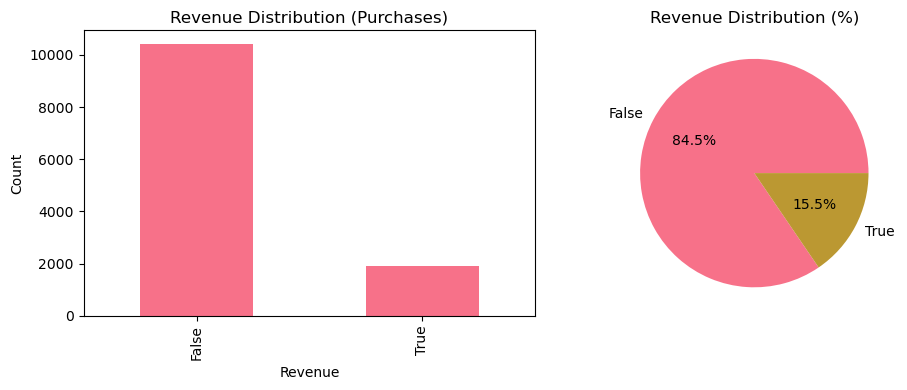

In [14]:
# Target variable analysis
print("=== TARGET VARIABLE ===")
target_counts = df['Revenue'].value_counts()
print(f"Target distribution:")
print(target_counts)

# Visualize target distribution
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
target_counts.plot(kind='bar')
plt.title('Revenue Distribution (Purchases)')
plt.xlabel('Revenue')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%')
plt.title('Revenue Distribution (%)')

plt.tight_layout()
plt.show()


=== NUMERICAL VARIABLES ===
Numerical columns: 14
['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']

=== KEY BEHAVIORAL VARIABLES ===


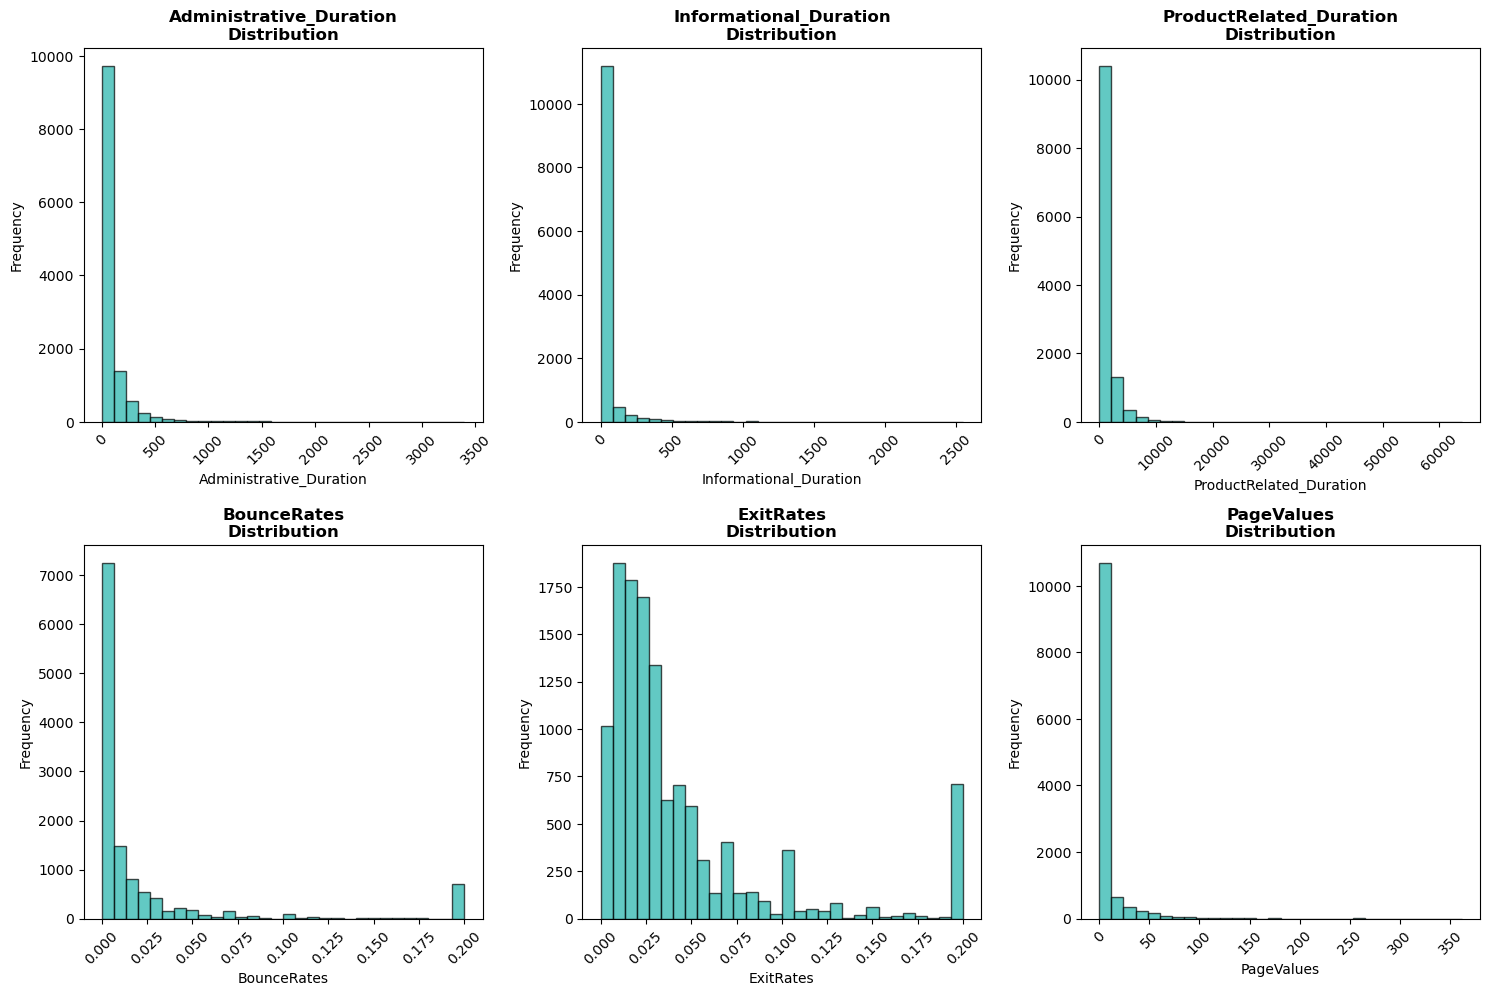


=== KEY VARIABLES SUMMARY ===
       Administrative_Duration  Informational_Duration  \
count             12330.000000            12330.000000   
mean                 80.818611               34.472398   
std                 176.779107              140.749294   
min                   0.000000                0.000000   
25%                   0.000000                0.000000   
50%                   7.500000                0.000000   
75%                  93.256250                0.000000   
max                3398.750000             2549.375000   

       ProductRelated_Duration   BounceRates     ExitRates    PageValues  
count             12330.000000  12330.000000  12330.000000  12330.000000  
mean               1194.746220      0.022191      0.043073      5.889258  
std                1913.669288      0.048488      0.048597     18.568437  
min                   0.000000      0.000000      0.000000      0.000000  
25%                 184.137500      0.000000      0.014286      0.00000

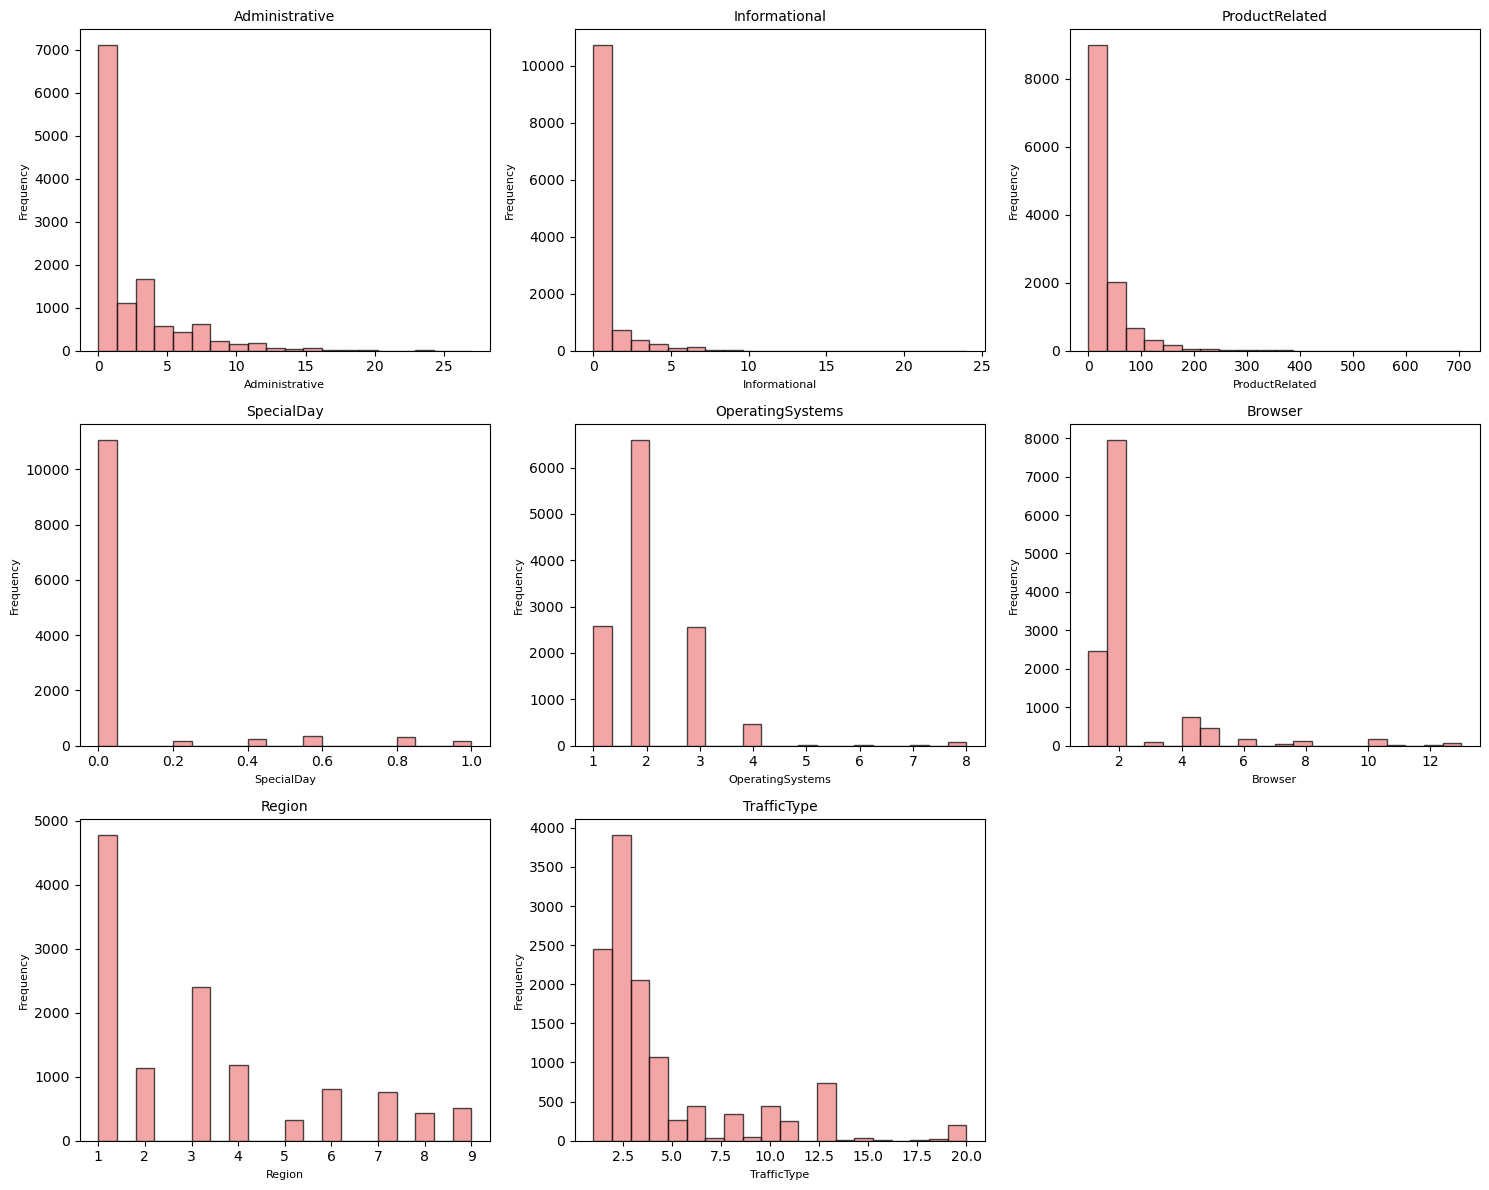

In [15]:
# Numerical variables analysis  
print("=== NUMERICAL VARIABLES ===")
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(f"Numerical columns: {len(numerical_cols)}")
print(list(numerical_cols))

# Focus on key behavioral variables (most important for online shopping)
key_behavioral_vars = ['Administrative_Duration', 'Informational_Duration', 
                      'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']

print("\n=== KEY BEHAVIORAL VARIABLES ===")
# Create a clean 2x3 grid for the most important variables
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(key_behavioral_vars):
    axes[i].hist(df[col], bins=30, alpha=0.7, color='lightseagreen', edgecolor='black')
    axes[i].set_title(f'{col}\nDistribution', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)
    # Rotate x-axis labels if needed
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Show statistics for key variables
print("\n=== KEY VARIABLES SUMMARY ===")
print(df[key_behavioral_vars].describe())

# For the remaining numerical variables, show them in a separate plot
remaining_vars = [col for col in numerical_cols if col not in key_behavioral_vars and col != 'Revenue']
if remaining_vars:
    print(f"\n=== OTHER NUMERICAL VARIABLES ({len(remaining_vars)}) ===")
    
    n_cols = 3
    n_rows = (len(remaining_vars) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    if n_rows == 1:
        axes = axes.flatten()
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(remaining_vars):
        axes[i].hist(df[col], bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
        axes[i].set_title(f'{col}', fontsize=10)
        axes[i].set_xlabel(col, fontsize=8)
        axes[i].set_ylabel('Frequency', fontsize=8)
    
    # Hide empty subplots
    for i in range(len(remaining_vars), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()


=== CATEGORICAL VARIABLES ===
Categorical columns: ['Month', 'VisitorType']

Month value counts:
Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64


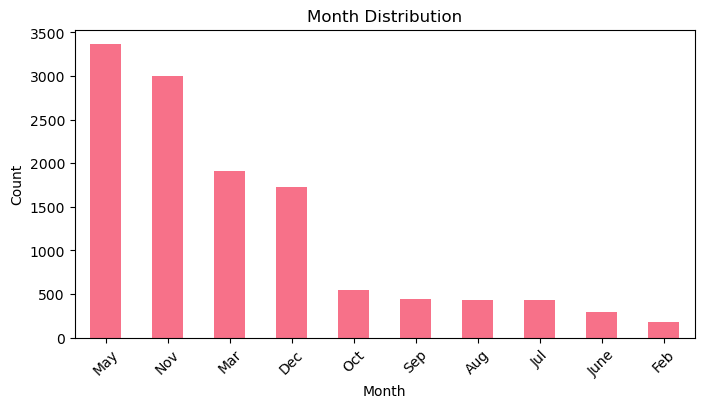


VisitorType value counts:
VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64


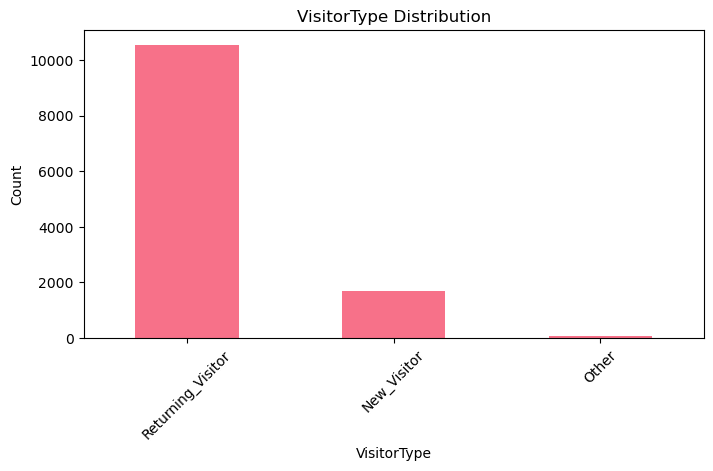

In [16]:
# Categorical variables analysis
print("=== CATEGORICAL VARIABLES ===")
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"Categorical columns: {list(categorical_cols)}")

for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())
    
    # Create bar plot
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


=== CORRELATION ANALYSIS ===


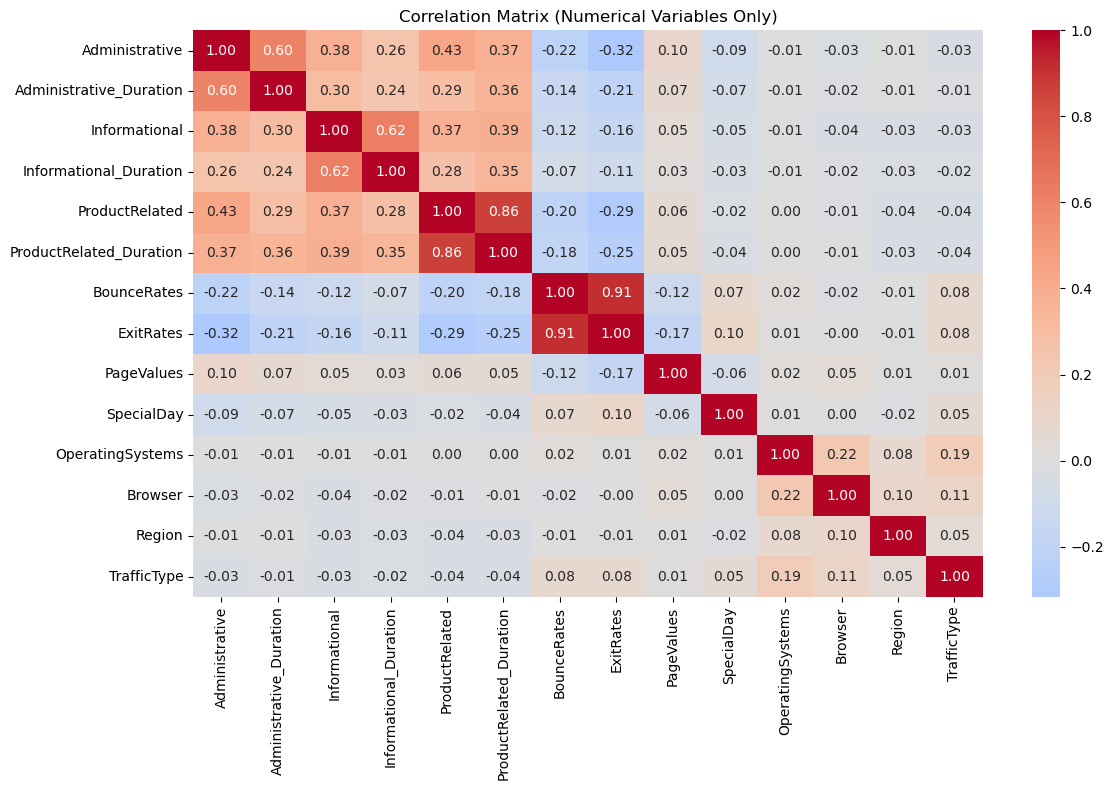

In [17]:
# Correlation analysis
print("=== CORRELATION ANALYSIS ===")

# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix (Numerical Variables Only)')
plt.tight_layout()
plt.show()

# Show correlations with target variable (Revenue)
if 'Revenue' in numerical_df.columns:
    target_correlations = correlation_matrix['Revenue'].sort_values(ascending=False)
    print("\nCorrelations with Revenue (Purchase) variable:")
    print(target_correlations)
    
    # Plot top correlations with Revenue
    plt.figure(figsize=(10, 6))
    top_correlations = target_correlations.drop('Revenue').head(10)
    top_correlations.plot(kind='barh', color='skyblue')
    plt.title('Top 10 Features Correlated with Revenue')
    plt.xlabel('Correlation Coefficient')
    plt.tight_layout()
    plt.show()


=== RELATIONSHIPS WITH TARGET (REVENUE) ===


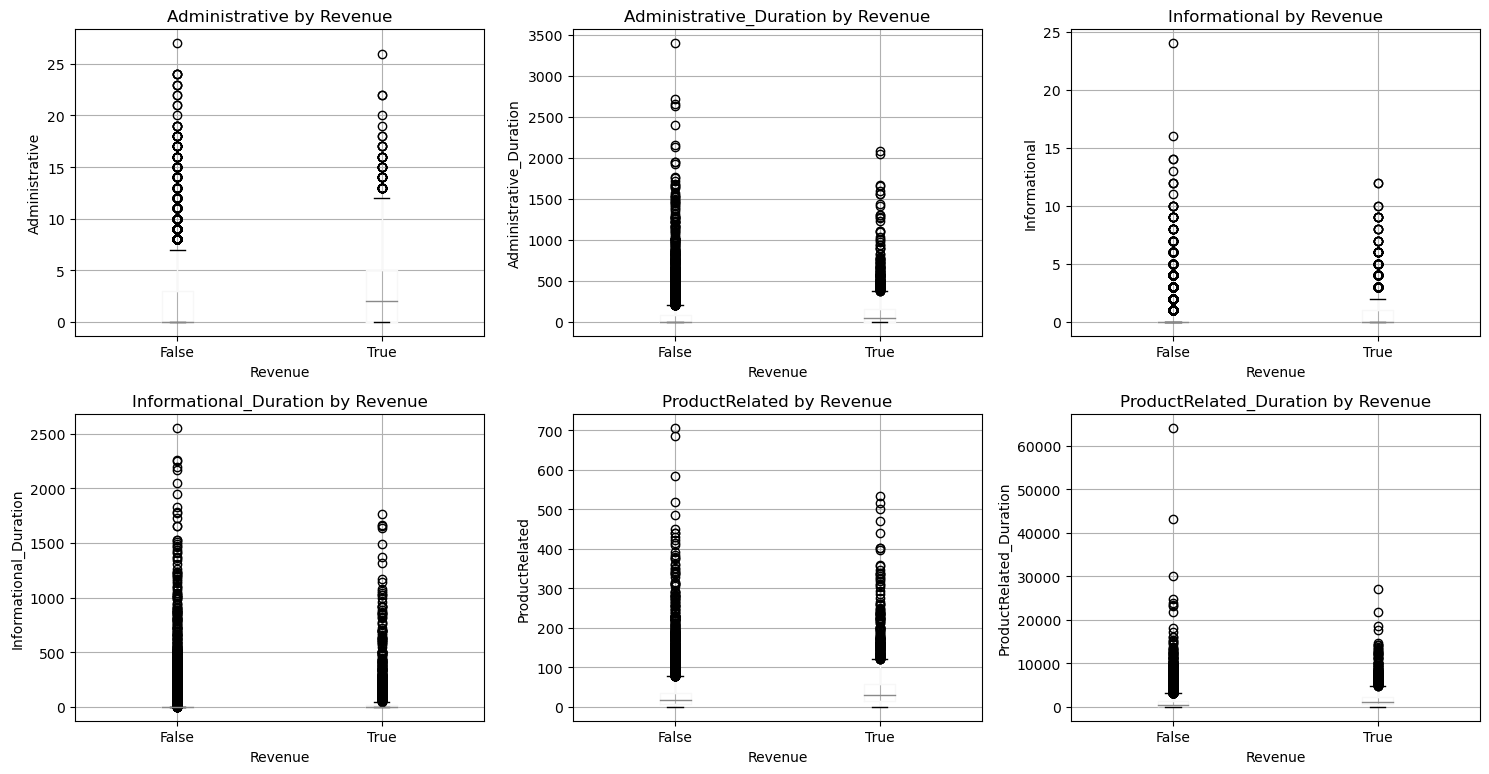


Month vs Revenue:
Revenue  False  True 
Month                
Aug       82.4   17.6
Dec       87.5   12.5
Feb       98.4    1.6
Jul       84.7   15.3
June      89.9   10.1
Mar       89.9   10.1
May       89.1   10.9
Nov       74.6   25.4
Oct       79.1   20.9
Sep       80.8   19.2


<Figure size 800x400 with 0 Axes>

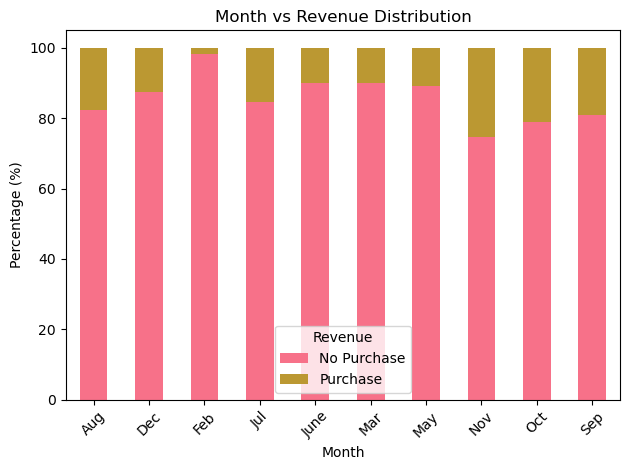


VisitorType vs Revenue:
Revenue            False  True 
VisitorType                    
New_Visitor         75.1   24.9
Other               81.2   18.8
Returning_Visitor   86.1   13.9


<Figure size 800x400 with 0 Axes>

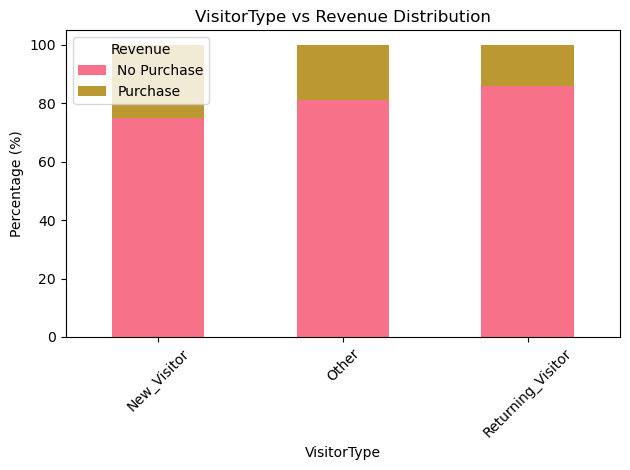

In [18]:
# Relationship between variables and target
print("=== RELATIONSHIPS WITH TARGET (REVENUE) ===")

# Box plots for numerical variables vs Revenue
numerical_cols_no_target = [col for col in numerical_cols if col != 'Revenue']

# Select top 6 numerical features for visualization (to avoid too many plots)
top_numerical = numerical_cols_no_target[:6] if len(numerical_cols_no_target) > 6 else numerical_cols_no_target

if len(top_numerical) > 0:
    n_cols = min(3, len(top_numerical))
    n_rows = (len(top_numerical) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    if n_rows == 1 and n_cols == 1:
        axes = [axes]
    elif n_rows > 1 and n_cols > 1:
        axes = axes.flatten()
    
    for i, col in enumerate(top_numerical):
        df.boxplot(column=col, by='Revenue', ax=axes[i])
        axes[i].set_title(f'{col} by Revenue')
        axes[i].set_xlabel('Revenue')
        axes[i].set_ylabel(col)
    
    # Hide empty subplots
    for i in range(len(top_numerical), len(axes)):
        axes[i].set_visible(False)
    
    plt.suptitle('')  # Remove automatic title
    plt.tight_layout()
    plt.show()

# Crosstabs for categorical variables vs Revenue
categorical_cols_no_target = [col for col in categorical_cols if col != 'Revenue']

for col in categorical_cols_no_target:
    print(f"\n{col} vs Revenue:")
    crosstab = pd.crosstab(df[col], df['Revenue'], normalize='index')
    crosstab_percent = crosstab * 100
    print(crosstab_percent.round(1))
    
    # Visualize the crosstab
    plt.figure(figsize=(8, 4))
    crosstab_percent.plot(kind='bar', stacked=True)
    plt.title(f'{col} vs Revenue Distribution')
    plt.xlabel(col)
    plt.ylabel('Percentage (%)')
    plt.legend(title='Revenue', labels=['No Purchase', 'Purchase'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## 3. Hypothesis Formulation

Based on your EDA, formulate **2-3 testable hypotheses**. Each hypothesis should be:
- Clear and specific
- Testable with statistical methods
- Grounded in your observations

### Hypothesis 1: Season Effect
**H1:** November has a significantly higher purchase conversion rate than other months. 
- **Null Hypothesis (H0):** There is no difference in purchase conversion rates between November and other months.
- **Alternative Hypothesis (H1):**  November has a higher purchase conversion rate than other months.
- **Rationale:** Based on EDA, November shows 25.4% purchase rate compared to the annual average, likely due to Black Friday and holiday shopping season.

### Hypothesis 2: Exit Rates Effect
**H2:** Visitors with higher Exit Rates are less likely to make purchases
- **Null Hypothesis (H0):** There is no relationship between Exit Rates and purchase behavior
- **Alternative Hypothesis (H1):** Higher Exit Rates are associated with lower purchase rates
- **Rationale:** My correlation matrix showed ExitRates is highly correlated with BounceRates (0.91), suggesting visitors who exit quickly are unlikely to make the purchase.


## 4. Hypothesis Testing

Test each hypothesis using appropriate statistical methods. For each test, explain:
- Why you chose this test
- The results and interpretation
- Whether you reject or fail to reject the null hypothesis


### Testing Hypothesis 1: Season Effect

**Test Choice:** Chi-square test
- **Why appropriate:** This test is suitable because we're comparing 2  categorical variables (Month categories vs Purchase outcomes) to determine if they're independent or related which the goal is to tests whether the distribution of purchases differs significantly across different months.


In [19]:
# Hypothesis 1 Testing
print("=== TESTING HYPOTHESIS 1 ===")

# Prepare data: Compare November vs all other months
november_purchases = df[df['Month'] == 'Nov']['Revenue']
other_months_purchases = df[df['Month'] != 'Nov']['Revenue']

# Create contingency table
contingency_table = pd.crosstab(df['Month'] == 'Nov', df['Revenue'])

print("Contingency Table:")
print(contingency_table)
print()

# Perform chi-square test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject H0: There is a significant difference in purchase rates between November and other months")
else:
    print("Fail to reject H0: No significant difference in purchase rates between November and other months")


=== TESTING HYPOTHESIS 1 ===
Contingency Table:
Revenue  False  True 
Month                
False     8184   1148
True      2238    760

Chi-square statistic: 294.3686
P-value: 0.0000
Reject H0: There is a significant difference in purchase rates between November and other months


### Testing Hypothesis 2: Exit Rates Effect

**Test Choice:** Independent t-test
- **Why appropriate:** I pick this test because we're comparing the means of a continuous variable (ExitRates) between two independent groups (Purchasers vs Non-purchasers) to see if there's a statistically significant difference.

In [20]:
# Hypothesis 2 Testing
print("=== TESTING HYPOTHESIS 2 ===")

# Prepare data: Compare ExitRates between purchasers and non-purchasers
purchasers_exit = df[df['Revenue'] == True]['ExitRates']
non_purchasers_exit = df[df['Revenue'] == False]['ExitRates']

print(f"Purchasers mean Exit Rate: {purchasers_exit.mean():.4f}")
print(f"Non-purchasers mean Exit Rate: {non_purchasers_exit.mean():.4f}")

# Perform t-test
t_stat, p_value = stats.ttest_ind(purchasers_exit, non_purchasers_exit, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject H0: There is a significant relationship between Exit Rates and purchase behavior")
else:
    print("Fail to reject H0: No significant relationship between Exit Rates and purchase behavior")



=== TESTING HYPOTHESIS 2 ===
Purchasers mean Exit Rate: 0.0196
Non-purchasers mean Exit Rate: 0.0474
T-statistic: -44.3321
P-value: 0.0000
Reject H0: There is a significant relationship between Exit Rates and purchase behavior


## 5. Summary and Conclusions

### Key Findings from EDA:
1. Strong seasonal patterns in purchase behavior, with November showing the highest conversion rate (25.4%) and February the lowest (1.6%).
2. Exit Rates and Bounce Rates are highly correlated (0.91) and both show strong negative relationships with engagement metrics.
3. PageValues and duration metrics show positive correlations with Revenue, suggesting engaged visitors are more likely to purchase.
4. Traffic quantity doesn't equal quality which some high-traffic months like May have average conversions while medium-traffic months (Nov) excel.

### Hypothesis Testing Results:

| Hypothesis | Test Used | p-value | Result | Interpretation |
|------------|-----------|---------|--------|-----------------|
| **H1** | Chi-square test | 0 | Significant | November has significantly higher conversion rates than other months |
| **H2** | Independent t-test | 0 | Significant | Higher Exit Rates are strongly associated with lower purchase likelihood |

### Key Insights:
- Seasonal timing is crucial for e-commerce success, with holiday seasons driving significantly higher conversions
- User engagement metrics (Exit Rates, Bounce Rates) are powerful predictors of purchase behavior
- Visitors who exit quickly (high Exit Rates) are 2.4x less likely to make purchases than engaged visitors
- November's Black Friday period represents a massive opportunity for targeted marketing and promotions

### Future Research:
- Analyze the impact of marketing campaigns on seasonal purchase patterns
- Investigate user segmentation by VisitorType (New vs Returning) across seasons
- Explore product category preferences during different seasonal periods

---

**Note:** Remember to replace the sample data with your actual dataset and fill in all the template sections with your own analysis and interpretations.

In [21]:
# Final summary
print("=== ANALYSIS COMPLETE ===")
print(f"Dataset analyzed: Online Shoppers Purchasing Intention Dataset")
print(f"Sample size: {len(df)} observations")
print(f"Number of features: {df.shape[1]-1} (excluding target)")
print(f"Target variable: Revenue (Purchase Indicator)")
print(f"\nKey Findings Summary:")
print(f"- November shows highest conversion rate (25.4%)")
print(f"- Exit Rates significantly lower for purchasers (0.0196 vs 0.0474)")
print(f"- Strong seasonal patterns in purchase behavior")
print(f"- Both hypotheses statistically confirmed (p < 0.0001)")
print(f"\nAnalysis completed successfully!")
print("\nMy Business Recommendations:")
print("1. Focus marketing efforts on high-conversion months (Sep-Nov)")
print("2. Monitor and optimize Exit Rates as key engagement metric")
print("3. Leverage seasonal trends for inventory and promotion planning")

=== ANALYSIS COMPLETE ===
Dataset analyzed: Online Shoppers Purchasing Intention Dataset
Sample size: 12330 observations
Number of features: 17 (excluding target)
Target variable: Revenue (Purchase Indicator)

Key Findings Summary:
- November shows highest conversion rate (25.4%)
- Exit Rates significantly lower for purchasers (0.0196 vs 0.0474)
- Strong seasonal patterns in purchase behavior
- Both hypotheses statistically confirmed (p < 0.0001)

Analysis completed successfully!

My Business Recommendations:
1. Focus marketing efforts on high-conversion months (Sep-Nov)
2. Monitor and optimize Exit Rates as key engagement metric
3. Leverage seasonal trends for inventory and promotion planning
